Image Reduction with K-Means
====

Use K-Means to find centroids that represent all clusters.

Replace the value of color channels of images with cluster representations(centroids).

***Goal***: Reduction of images, save the information needed to transfer large objects, such as images, and avoid unit-by-unit or pixel-by-pixel.

Details of K-Means https://en.wikipedia.org/wiki/K-means_clustering

**Notice**: We use sklearn, so the interpretation of the algorithm is based on the output of sklearn, and although this does not represent the full extent of K-Means, it is sufficient to explain everyday work.

-----

Additional reading is PCA([Principal Component Analysis](https://teetracker.medium.com/dimensionality-reduction-of-image-with-pca-3e0375a68508)) which is a more general unsupervised learning method and is used in many fields of Dimensionality Reduction. Similarly the Autoencoder is very challenging as a deep learning method.

In [ ]:
SELECT_CLUSTER = 6

In [ ]:
import cv2
import sklearn
import pathlib
import numpy as np

from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image

In [ ]:
plt.rcParams["figure.figsize"]=[8,8]

### Upload image

In [ ]:
def upload_file():
  uploaded = files.upload()

  for fn in uploaded.keys():
    image = cv2.imread(fn)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
image = upload_file()

Saving elonmusk.png to elonmusk.png


### Peer upload image

In [ ]:
def plot_image(image):
  plt.axis("off")
  plt.imshow(image)
  plt.show()

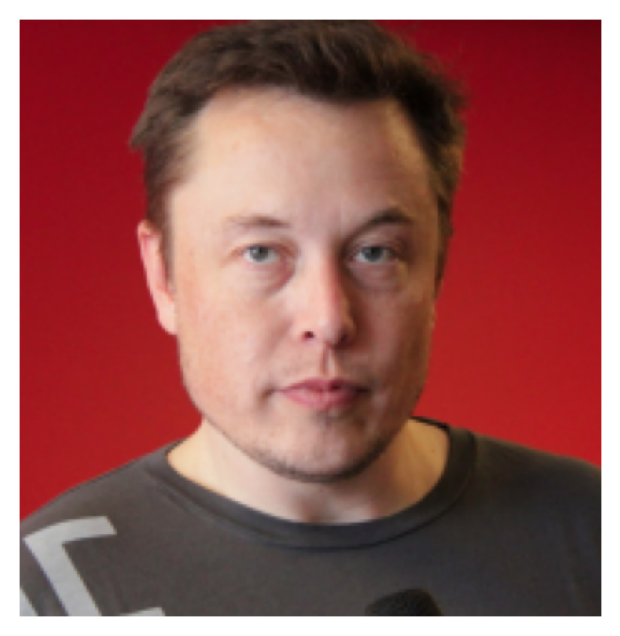

In [ ]:
plot_image(image)

In [ ]:
def plot_image_intensity(image_np):
  '''
  Plot histogram of RGB intensities.
  image_np: np-array representing image.
  '''
  fig = plt.figure(figsize=(20, 2.5))

  ax0 = fig.add_subplot(141)
  axs = [fig.add_subplot(142), fig.add_subplot(143), fig.add_subplot(144)]

  intensity_range = np.array([x for x in range(256)])
  color = ('blue', 'green', 'red')
  histr_list = []

  for i, col in enumerate(color):
      histr = cv2.calcHist(image_np, [i], None, [256], [0, 256])
      histr_list.append(histr)
      ax0.plot(intensity_range, histr, color=col)
      plt.xlim([0, 256])

  for i, h in enumerate(histr_list):
      axs[i].plot(intensity_range, h, color=color[i])
      plt.xlim([0, 256])

  plt.show()

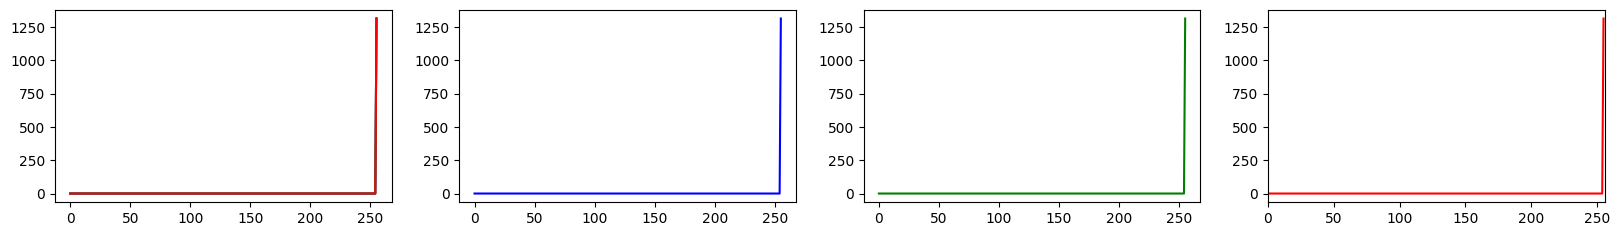

In [ ]:
plot_image_intensity(image)

### Process of K-Means

- Start by a random initial point (we will use kmeans++ as default for init points).

- For the second pick, instead of getting it randomly, we’re going to prioritize far away points by assigning a probability of the distance of each point squared, over the sum of all the distances squared for each point from that initial centroid.

Details: https://en.wikipedia.org/wiki/K-means_clustering


### Flatten image


Image is a 2-dim array with color channels(general three or four), ie. (32,32,3).

Our goal for using K-Means is to find centroids of each cluster. The centroid should be represented by a scalar (single number) or a high-dimensional vector.

A quite natural idea coming up is to move the color channel to be the primitive representation of data, in other word is to say that **a data-point is represented by a vector**.

Imagine an array or a list of 3-dim vectors.

In [ ]:
image.shape

(449, 438, 3)

In [ ]:
image_flatten = image.reshape(-1,3)
image_flatten.shape

(196662, 3)

#### Find centroids `image_flatten`

Now the image has been flattened into an array with contents of 3-dim vectors. Comparing with array of scalar this array has just additional information, the logical of getting centroid must be the same internally (via scikit-learn package).

We will use this array to find out the centroids.

### Metric selection

There are two metrics that support us to select "K":

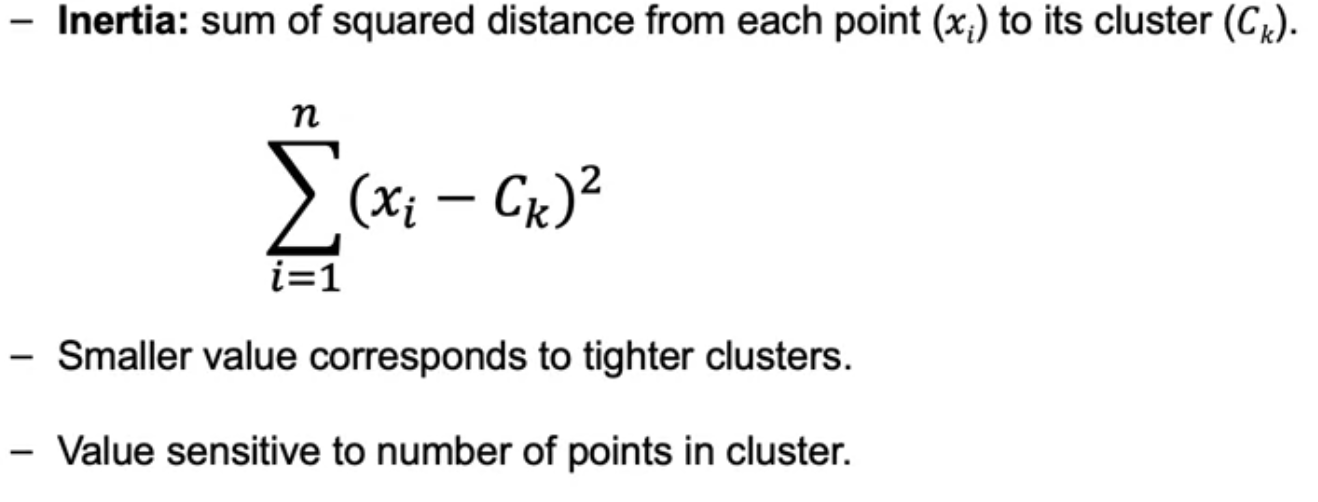



------------------




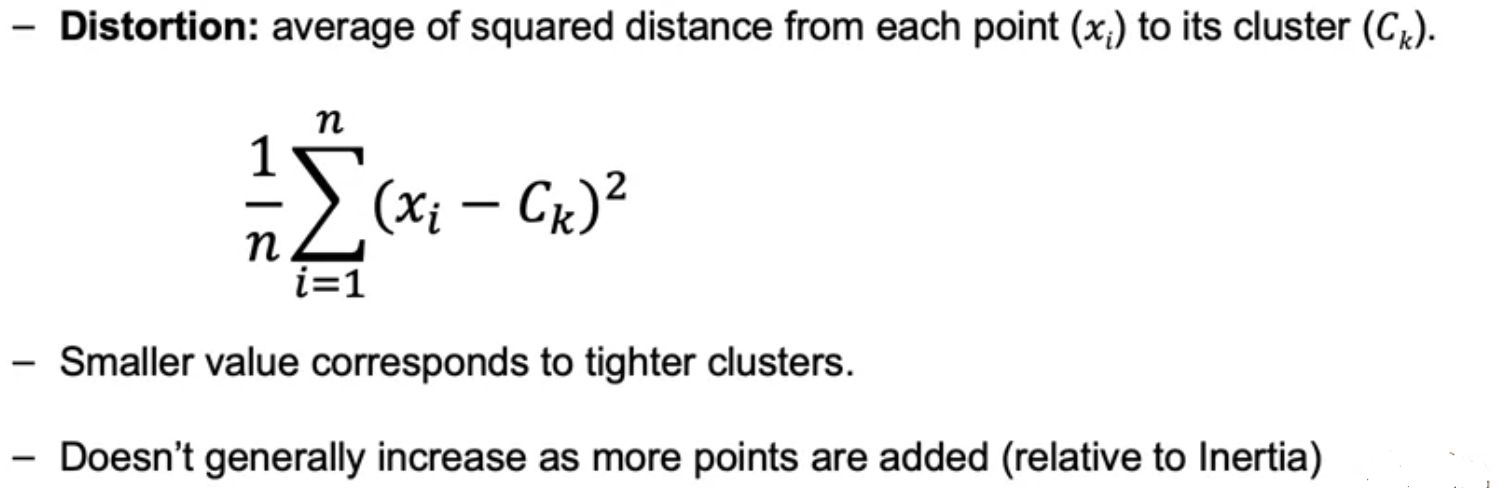

#### How to use?

**Inertia** will always increase as more members are added to each cluster. But this will not be the case withdistortion, since it’ll work by taking that average.

When the similarity of points in the cluster is more important, you should use **Distortion**. And if you’re more concerned that clusters have similar numbers of points, then you should use inertia.

#### Inertia Vs. Distortion

Both Inertia and Distortion are measures of entropy per-cluster.

Inertia will always increase as more members are added to each cluster, while this will not be the case with distortion.

When the similarity of the points in the cluster are very relevant, you should use distortion and if you are more concerned that clusters should have a similar number of points, then you should use inertia.

We'll plot both against selection of `n_clusters`.

In [ ]:
from sklearn.cluster import KMeans

def fit_KMeans(n_clusters, n_seed=123):
  kmeans = KMeans(n_clusters, random_state=n_seed)
  kmeans.fit(image_flatten)

  return kmeans

##### Try K-Means with different clusters

In [ ]:
n_min = 1
n_max = 10
n_clusters_list = list(range(n_min, n_max+1))

results = [fit_KMeans(n_clusters) for n_clusters in n_clusters_list]

inertia_list = list(map(lambda x: x.inertia_, results))
distortion_list = list(map(lambda x: x.inertia_// len(image_flatten), results))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'distortion')

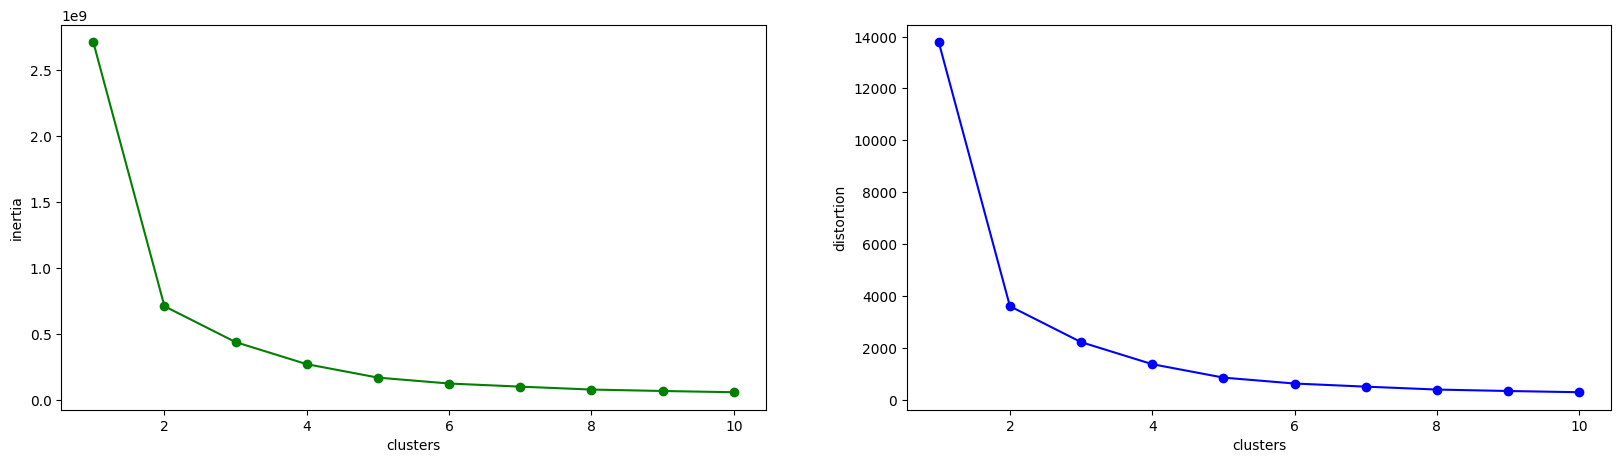

In [ ]:
fig, axes = plt.subplots(1,2 , figsize=(20, 5))

axes[0].plot(n_clusters_list, inertia_list, c="g")
axes[0].scatter(n_clusters_list, inertia_list, c="g")
axes[0].set_xlabel("clusters")
axes[0].set_ylabel("inertia")

axes[1].plot(n_clusters_list,distortion_list, c="b")
axes[1].scatter(n_clusters_list, distortion_list, c="b")
axes[1].set_xlabel("clusters")
axes[1].set_ylabel("distortion")

### Image reduction

In [ ]:
def rebuild_image(image_shape, centroid_ids, centroids):
  '''
  The order of labels_ is exactly the same as the observations (image_flatten),
  except that the content is the corresponding cluster centroid ID.
  labels_: [2, 2, 3, 4, 6....]
  observations: [ [1,2,3], [4,5,6], [3,4,6], [2,4,6], [7,4,3].... ]
  Each centroid ID points to some items in the image_flatten, which means
  the data points of image_flatten belonging to one cluster share
  the same ID.
  Goal: Replace the content of image_flatten with the corresponding centroids (following labels_)

  image_shape: origin image shape
  centroid_ids:  cluster centroid IDs for each pixel
  centroids: value of centroids, expected 3 channel based.
  '''
  image_reduc = np.zeros(image_shape, dtype="uint8")
  image_reduc = image_reduc.reshape(-1, image_shape[-1])

  unique_centroid_ids = set(centroid_ids)

  for c_id in unique_centroid_ids:

    # (numpy array index selection)
    # select array indices which belong to the current centroid.
    arr_idx_mask = centroid_ids == c_id

    # replace content of selected content with the centroid.
    image_reduc[arr_idx_mask] = centroids[c_id]

  image_reduc = image_reduc.reshape(image_shape)
  return image_reduc

#### Select one k-means for reduction

In [ ]:
kmeans = results[SELECT_CLUSTER-1]
centroid_ids = kmeans.labels_.astype(np.uint8)
centroids = kmeans.cluster_centers_.astype(np.uint8)
image_shape = image.shape

image_reduc = rebuild_image(image_shape,
                           centroid_ids,
                           centroids)

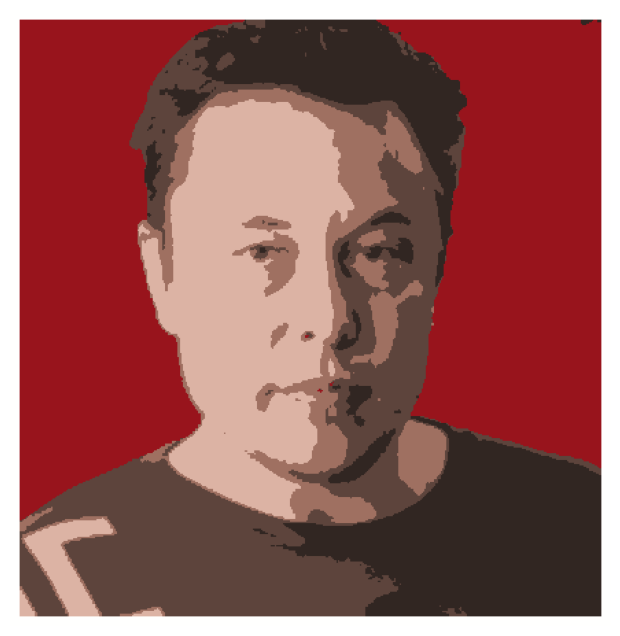

In [ ]:
plot_image(image_reduc.reshape(image_shape))

### Intensity comparison before and after

We get lose of intensity comaring the origin image, but this is actually the part of our goal, because in some usecase the receiver doesn't want to see the full quality of image.

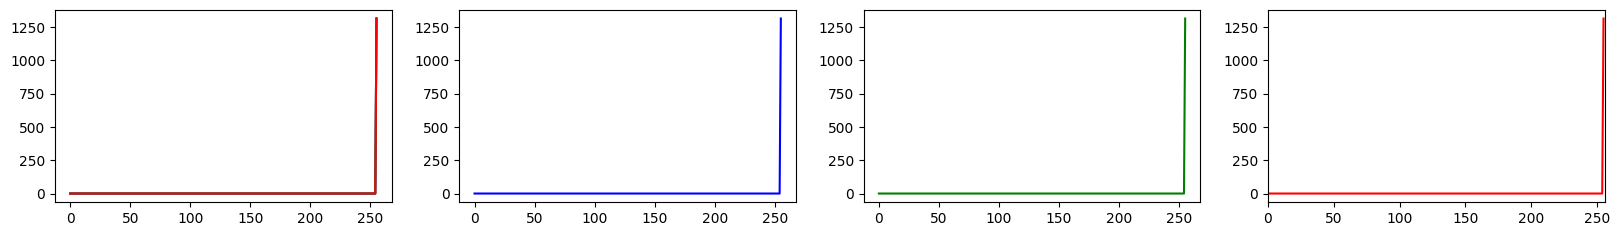

In [ ]:
plot_image_intensity(image)

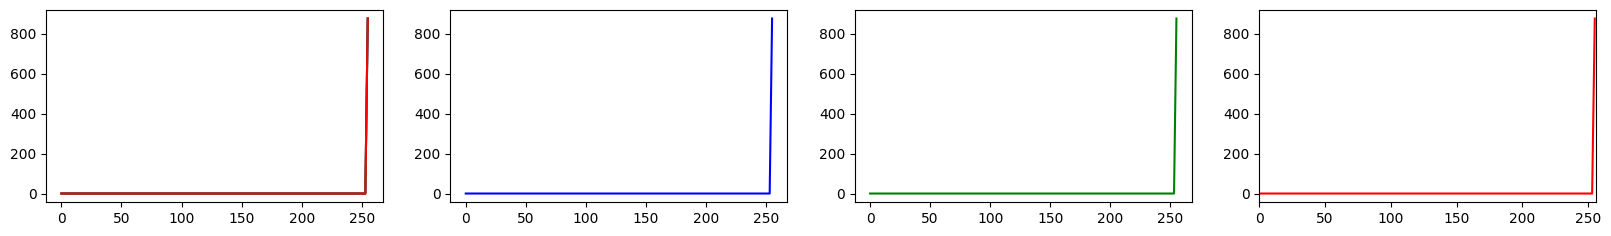

In [ ]:
plot_image_intensity(image_reduc)

# Conclusion

Why do we need this tech?

In fact, there are many usecases for it, so I'll point out one here.

Imagine we want to transfer an image, so transfer colour channels pixel by pixel, a quite straightforward way is to transfer all of data to the receiver. With such tech we only need to let receiver know `image shape`, transfer `centroid_ids` and `labels_`, finally rebuild the image like the  `rebuild_image()` does.

In [ ]:
import sys
import pandas as pd

#### Before

In [ ]:
before_df = pd.Series(image.nbytes/1000, name="Before", index=["Size in KB."]).to_frame()
before_df

,Before
Size in KB.,589.986


#### After

In [ ]:
print("centroid_ids:", centroid_ids.nbytes/1000, "KB.")
print("centroids:", centroids.nbytes/1000, "KB.")

after_df = pd.Series((centroid_ids.nbytes + centroids.nbytes)/1000, name="After", index=["Size in KB."]).to_frame()
after_df

centroid_ids: 196.662 KB.
centroids: 0.018 KB.


,After
Size in KB.,196.68


,Size in KB.
Before,589.986
After,196.680


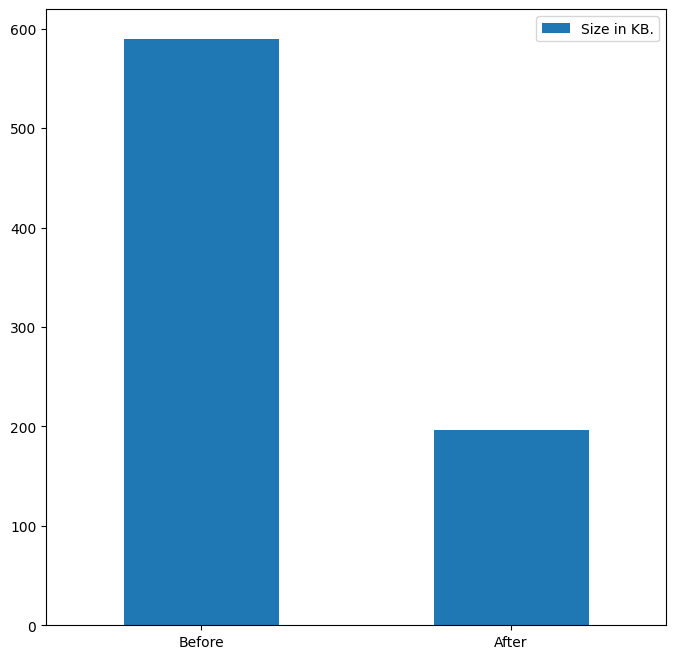

In [ ]:
total_df = pd.concat([before_df, after_df], axis=1).T
total_df.plot.bar(rot=0)
total_df

In [ ]:
del image, image_flatten, image_reduc, centroid_ids, centroids